In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import streamlit as st

In [39]:
file_path = "C:/Users/user/Desktop/han-toss-dashboard/data/ecos.csv"
df = pd.read_csv(file_path)
df.head()

,DATE,aptpriceindex,cd,unemploymentrate,constructionpricerate,cpi
0,2015/01,73.1,2.00,3.7,100.40,94.643
1,2015/02,73.3,2.00,4.5,100.18,94.587
2,2015/03,73.7,1.75,4.0,100.07,94.596
3,2015/04,74.3,1.75,3.9,99.76,94.625
4,2015/05,74.8,1.75,3.7,99.69,94.890


In [40]:
df['DATE'] = pd.to_datetime(df['DATE'])

C:\Users\user\AppData\Local\Temp\ipykernel_22884\1090940039.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


pandas.core.series.Series

In [41]:
years = mdates.YearLocator()  # every year
years_fmt = mdates.DateFormatter('%Y')

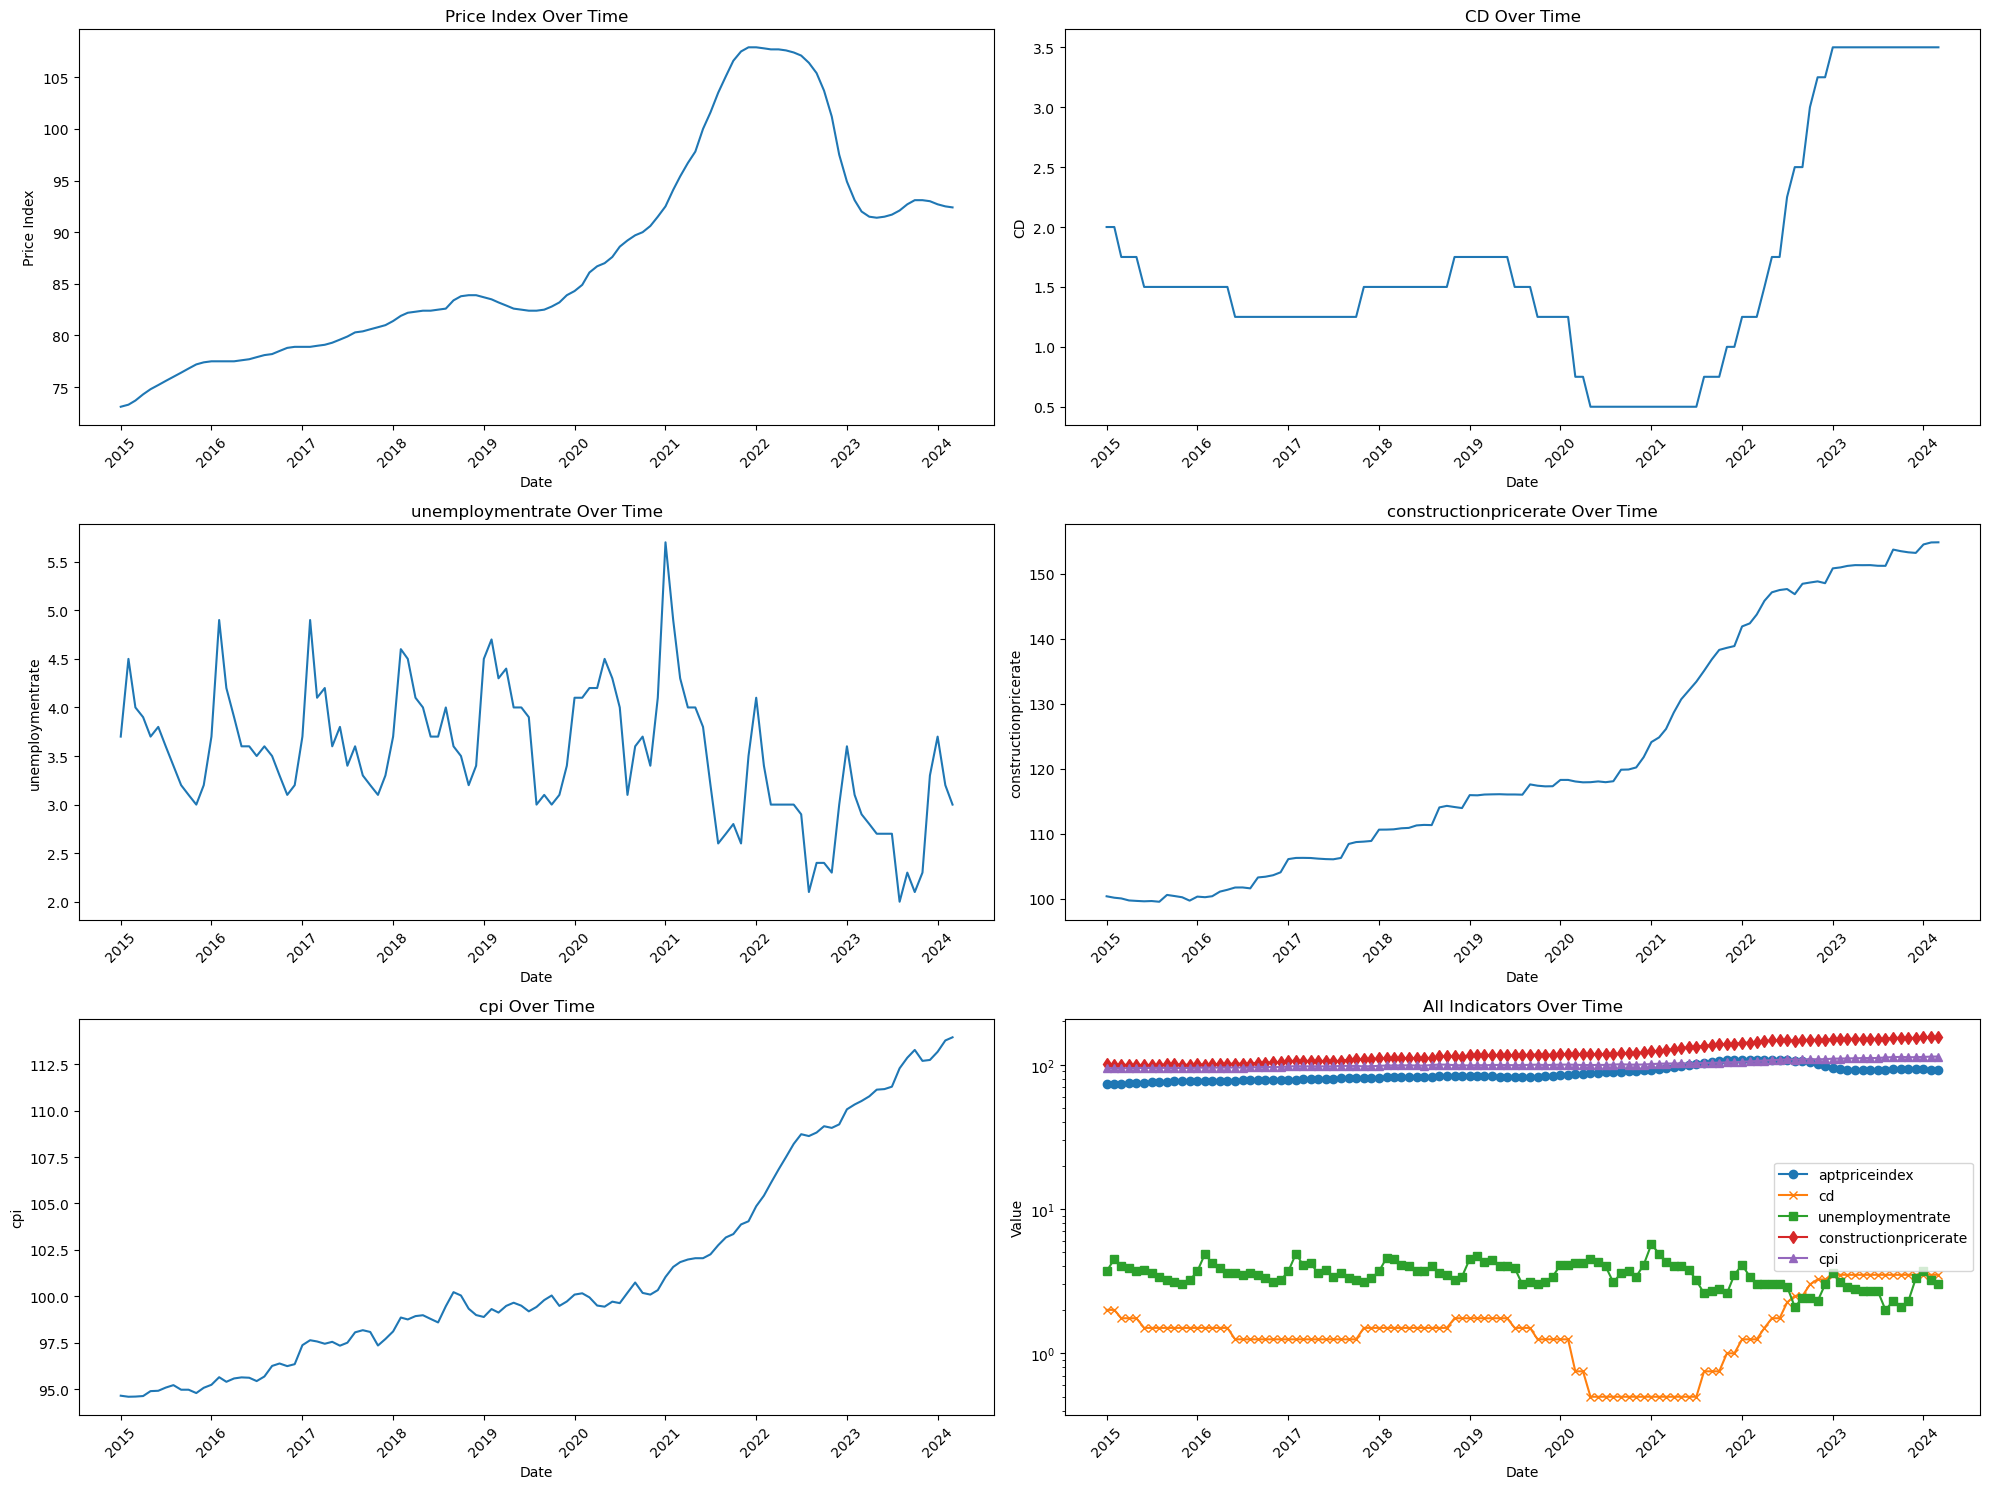

In [44]:
fig, ax = plt.subplots(3,2, figsize = (20,15))
# 첫 번째 서브플롯
ax[0, 0].plot(df['DATE'], df['aptpriceindex'])
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Price Index')
ax[0, 0].set_title('Price Index Over Time')
ax[0, 0].xaxis.set_major_locator(years)
ax[0, 0].xaxis.set_major_formatter(years_fmt)

ax[0, 1].plot(df['DATE'], df['cd'])
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('CD')
ax[0, 1].set_title('CD Over Time')

ax[1, 0].plot(df['DATE'], df['unemploymentrate'])
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('unemploymentrate')
ax[1, 0].set_title('unemploymentrate Over Time')

ax[1, 1].plot(df['DATE'], df['constructionpricerate'])
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('constructionpricerate')
ax[1, 1].set_title('constructionpricerate Over Time')

ax[2, 0].plot(df['DATE'], df['cpi'])
ax[2, 0].set_xlabel('Date')
ax[2, 0].set_ylabel('cpi')
ax[2, 0].set_title('cpi Over Time')


# 다섯 가지 지표를 한 그래프에 표시
ax[2, 1].plot(df['DATE'], df['aptpriceindex'], marker='o', label='aptpriceindex')
ax[2, 1].plot(df['DATE'], df['cd'], marker='x', label='cd')
ax[2, 1].plot(df['DATE'], df['unemploymentrate'], marker='s', label='unemploymentrate')
ax[2, 1].plot(df['DATE'], df['constructionpricerate'], marker='d', label='constructionpricerate')
ax[2, 1].plot(df['DATE'], df['cpi'], marker='^', label='cpi')
ax[2, 1].set_xlabel('Date')
ax[2, 1].set_ylabel('Value')
ax[2, 1].set_title('All Indicators Over Time')
ax[2, 1].set_yscale('log')
ax[2, 1].legend()




# 날짜 레이블이 잘 보이도록 회전
for ax_row in ax:
    for ax_item in ax_row:
        for label in ax_item.get_xticklabels():
            label.set_rotation(45)
            
# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

df_1.set_index('DATE', inplace=True)

# 데이터프레임의 모든 열을 숫자로 변환
df_1 = df_1.apply(pd.to_numeric, errors='coerce')

# aptpriceindex과 다른 변수들 간의 상관관계 계산
variables = ['cd', 'unemploymentrate', 'constructionpricerate']
correlations = {}

for var in variables:
    corr, p_value = pearsonr(df_1['aptpriceindex'], df_1[var])
    correlations[var] = (corr, p_value)

# 상관관계 결과 출력
for var, (corr, p_value) in correlations.items():
    print(f"The correlation between aptpriceindex and {var} is {corr:.2f} with a p-value of {p_value:.2f}")

In [24]:
X = df[['cd', 'unemploymentrate', 'constructionpricerate', 'cpi']]
y = df['aptpriceindex']
# 상수 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          aptpriceindex   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     452.9
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.16e-65
Time:                        09:47:59   Log-Likelihood:                -252.26
No. Observations:                 111   AIC:                             514.5
Df Residuals:                     106   BIC:                             528.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   177.32

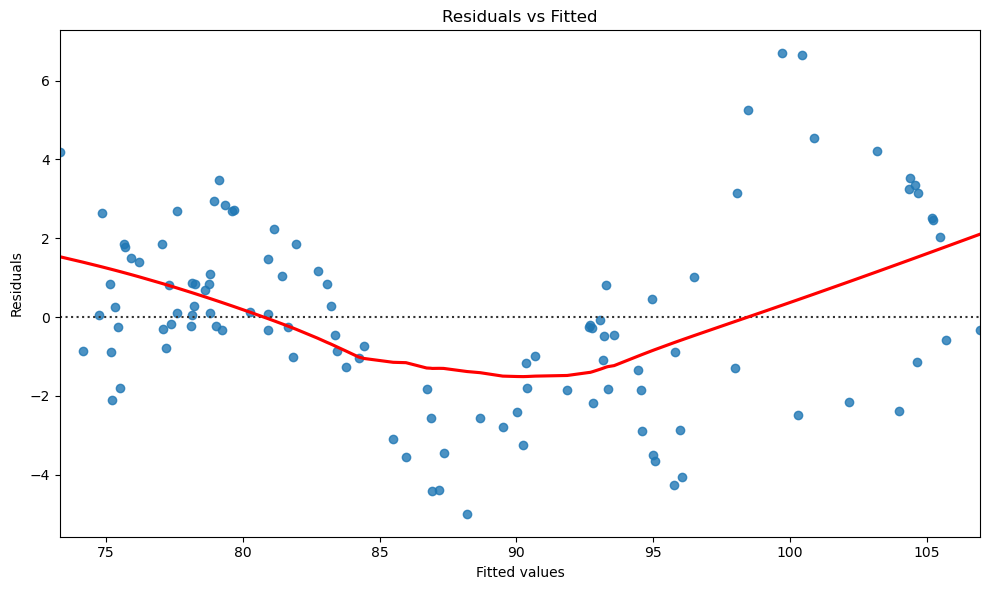

In [45]:
# 잔차 플롯
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.tight_layout()
plt.show()

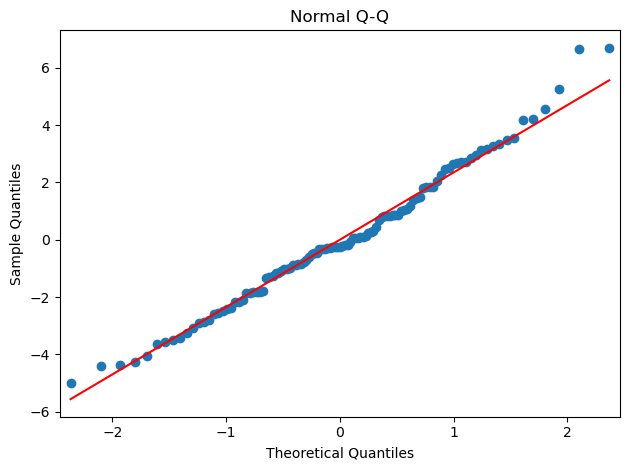

In [46]:
# 2. 잔차의 정규성 검정 (Q-Q Plot)
sm.qqplot(model.resid, line='s')
plt.title('Normal Q-Q')
plt.tight_layout()
plt.show()

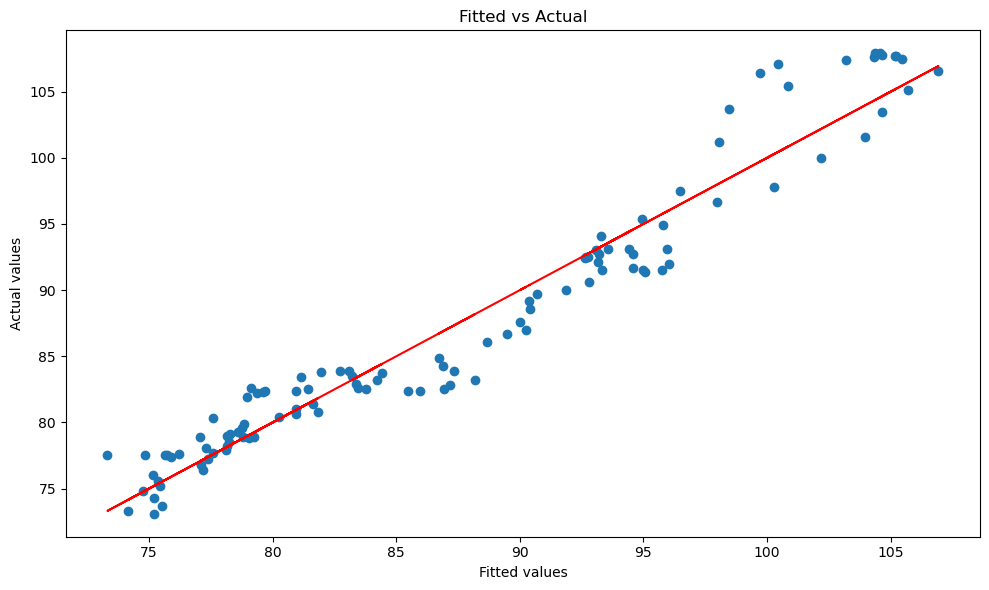

In [48]:
# 3. 예측 값 대 실제 값 플롯
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, y)
plt.plot(model.fittedvalues, model.fittedvalues, color='red')
plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Fitted vs Actual')
plt.tight_layout()
plt.show()

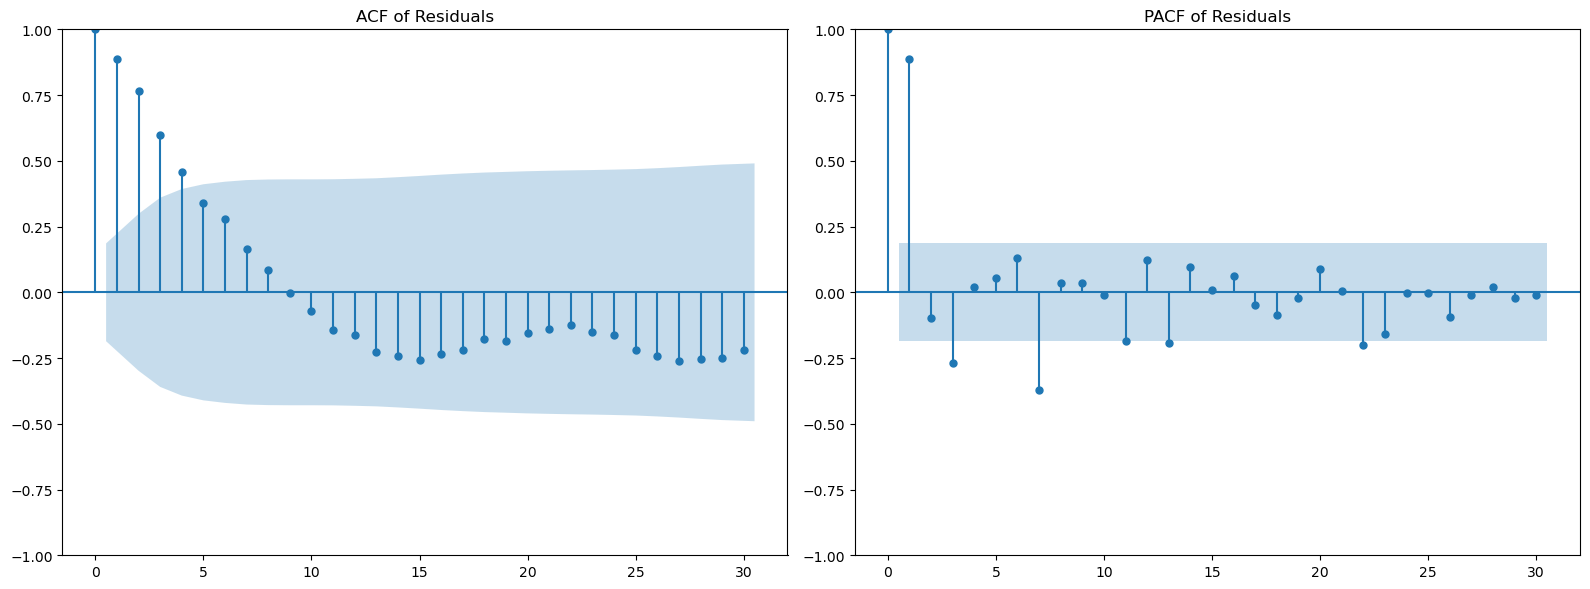

In [47]:
# 4. 잔차의 자기상관 (ACF 플롯)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(model.resid, lags=30, ax=ax[0])
plot_pacf(model.resid, lags=30, ax=ax[1])
ax[0].set_title('ACF of Residuals')
ax[1].set_title('PACF of Residuals')
plt.tight_layout()
plt.show()